In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
# Question 2
p_req_db = -110
p_req = 10**((p_req_db - 30)/10)
freq = 2 * 10**9
c = 3 * 10**8
wavelength = c/freq
R = 5000

Gt = 10**15
Gr = 10**2

Pt = p_req/(Gt * Gr * (wavelength/(4 * np.pi * 5000))**2)

Gwire = (10**0.8)
Pout = Gwire * Pt
Pout
%whos

Variable     Type      Data/Info
--------------------------------
Gr           int       100
Gt           int       1000000000000000
Gwire        float     6.309573444801933
Pout         float     1.1070754460411327e-19
Pt           float     1.7545963379714417e-20
R            int       5000
c            int       300000000
freq         int       2000000000
matplotlib   module    <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np           module    <module 'numpy' from 'D:\<...>ges\\numpy\\__init__.py'>
p_req        float     1e-14
p_req_db     int       -110
plt          module    <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sp           module    <module 'scipy' from 'D:\<...>ges\\scipy\\__init__.py'>
wavelength   float     0.15


<IPython.core.display.Javascript object>


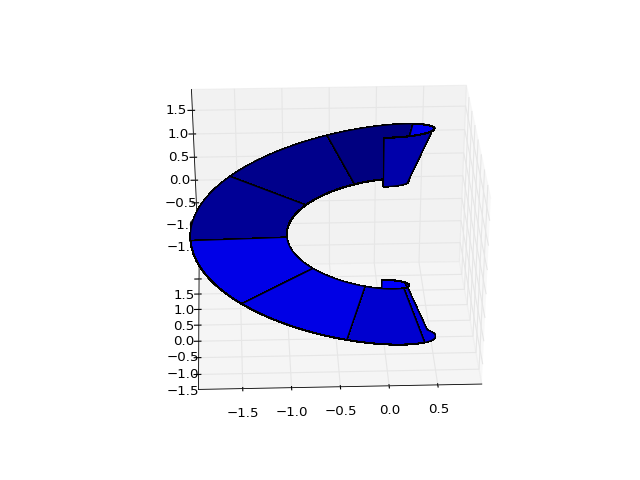

In [5]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def spherical_plot(azi, the):
    if (0 < azi and azi < np.pi/2 and 0 < the and the < np.pi/2):
        return 2.0
    else:
        return 1.0
    
    
azi = np.linspace(0, 2*np.pi, 500)
the = np.linspace(0, np.pi, 500)
out_list = []

for t in the:
    for a in azi:
        f = spherical_plot(a, t)/((1/(4*pi)) * )